# Variasi Jendela

* Fungsi Jendela

Bagi sinyal analog atau diskrit yang berfluktuasi tanpa batas waktu dalam bentuk gelombang sinusoidal, spektrumnya muncul sebagai fungsi delta di frekuensi yang sesuai. Namun, dalam situasi praktis, spektrum sinyal harmonik yang memiliki batasan waktu nyata akan tampak sebagai fungsi lainnya.

\begin{equation}
\frac{sin(x)}{x} - sinc(x)
\end{equation}

Lebar lobe utama dalam domain frekuensi dari transformasi Fourier suatu sinyal bergantung pada durasi interval analisis T. Batasan waktu ini terjadi saat sinyal dikalikan dengan envelope persegi, yang juga dikenal sebagai 'rectangular window'.

Melakukan perkalian sinyal di domain waktu sama dengan melakukan konvolusi spektrumnya di domain frekuensi (dan sebaliknya: melakukan konvolusi sinyal di domain waktu sama dengan melakukan perkalian spektrumnya di domain frekuensi). Akibatnya, spektrum dari sinyal harmonik yang dibatasi oleh envelope persegi setara dengan ~ <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>sinc</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>. Konsep ini juga berkaitan dengan keterbatasan kita untuk mengintegrasikan sinyal selama interval waktu yang tidak terbatas, dan transformasi Fourier dalam bentuk diskrit, yang diwakili oleh jumlah sampel terbatas, juga dibatasi oleh jumlah sampel tersebut.

Biasanya, panjang FFT (Transformasi Fourier Cepat) dalam perangkat pemrosesan sinyal digital modern mengambil nilai <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>NFFT</mi>
    <mrow data-mjx-texclass="ORD">
    </mrow>
  </msub>
</math> dari 8 hingga beberapa juta titik. Dengan membatasi sinyal pada interval N, kita efektif menerapkan "jendela" berbentuk persegi panjang dengan durasi N sampel. Oleh karena itu, spektrum yang dihasilkan adalah spektrum dari sinyal harmonik yang dikalikan dengan envelope persegi panjang.

Mari kita lanjutkan dengan contoh. Kita akan membangun spektrum dari sinyal harmonik pendek dengan parameter berikut: panjang sinyal <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>N</mi>
  <mo>=</mo>
  <mn>256</mn>
</math>, panjang FFT N_{FFT} = 2048. Untuk memperjelas, kita akan mempresentasikan grafik spektrum dalam skala logaritmik.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sig

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM) 
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL) 
plt.rc('legend', fontsize=FONT_MEDIUM) 
plt.rc('figure', titlesize=FONT_MEDIUM)

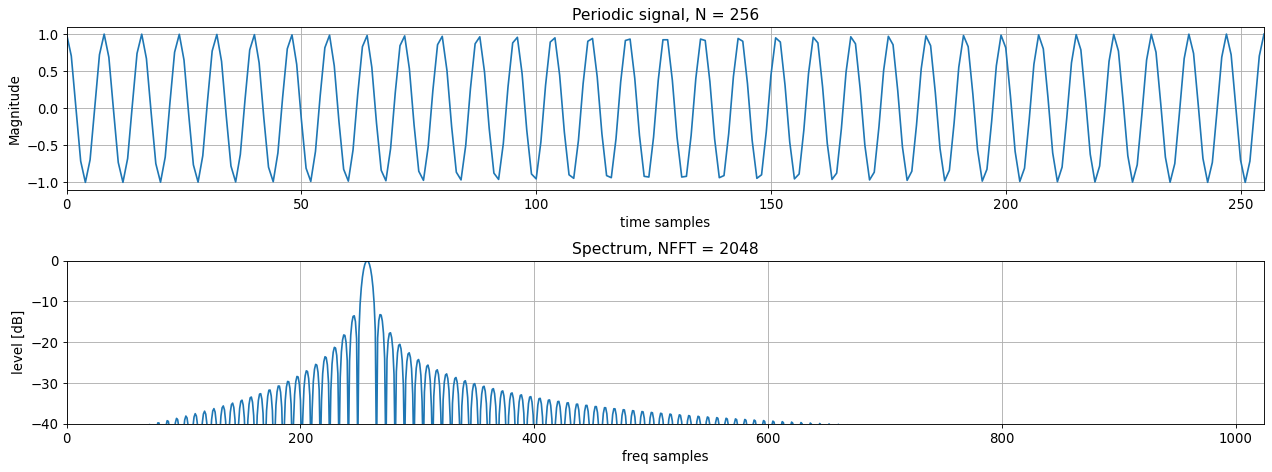

In [3]:
# Input parameters
N = 256
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(NFFT))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, NFFT//2])
plt.ylim([-40, 0])
plt.grid(True)
plt.tight_layout()

Seperti yang dapat diamati, spektrum dari sinyal harmonik pendek dalam situasi kehidupan sehari-hari tidak muncul sebagai delta function, melainkan lebih mirip dengan konvolusi antara spektrum sinyal persegi dan sinyal harmonik. Saat digambarkan dalam grafik, hanya separuh domain frekuensi yang ditampilkan. Sinyal akhirnya memiliki sifat simetri terhadap setengah frekuensi sampling atau parameter \begin{equation}\frac{N_{FFT}}{2}\end{equation}.

Ingatlah bahwa spektrum sinyal persegi setara dengan ekspresi ~ <mfrac xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow>
    <mi>sin</mi>
    <mo stretchy="false">(</mo>
    <mi>x</mi>
    <mo stretchy="false">)</mo>
  </mrow>
  <mi>/ x</mi>
</mfrac>
<mo>=</mo>
<mi>sinc</mi>
<mo stretchy="false">(</mo>
<mi>x</mi>
<mo stretchy="false">)</mo>. Artinya, pada frekuensi sinyal, spektrum sinyal persegi seolah-olah "tersusun" di atas delta function. Ketika durasi sinyal harmonik diperbesar dalam domain waktu, spektrumnya cenderung menjadi delta function pada frekuensi sinyal tersebut, sementara pengaruh jendela persegi berkurang.

Jadi, membatasi sinyal dalam waktu mengakibatkan penerapan "jendela" berbentuk persegi panjang. Pada contoh di bawah ini, durasi sinyal secara signifikan diperbesar <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>N</mi>
  <mo>=</mo>
  <mn>65536</mn>
</math>. Seperti yang terlihat, spektrum sinyal semacam itu cenderung menjadi delta function?

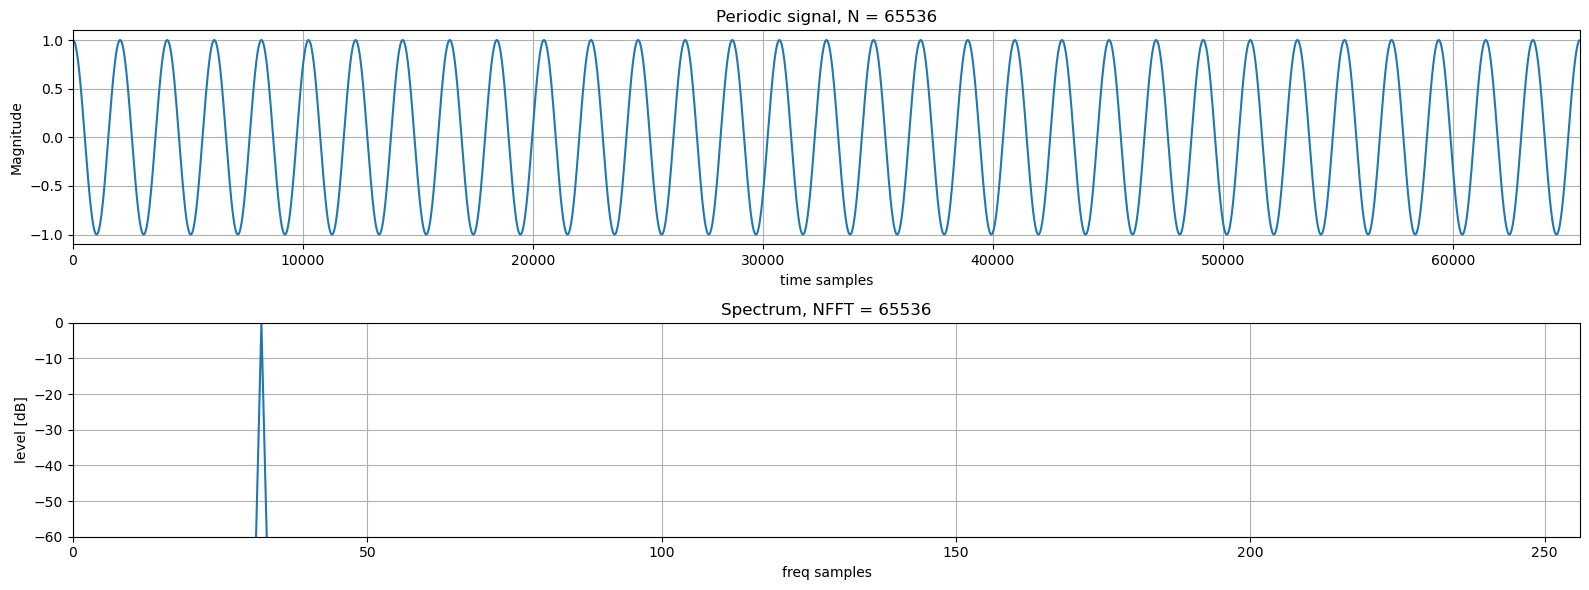

In [2]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Input parameters
N = 65536

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, N))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(N))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, N//256])
plt.ylim([-60, 0])
plt.grid(True)
plt.tight_layout()
plt.show()


Dalam kehidupan sehari-hari dan dalam praktiknya, penggunaan sinyal yang tak terbatas merupakan tantangan yang tidak mungkin dan membutuhkan sumber daya yang signifikan:

1. Sinyal yang sangat panjang memerlukan ruang penyimpanan besar.
2. Sinyal panjang mengandung lebih banyak energi, sulit untuk ditransmisikan dan diterima.
3. Pengolahan sinyal panjang memerlukan lebih banyak sumber daya komputasi.
4. Sinyal panjang lebih rentan terhadap distorsi karena penyebarannya dalam medium fisik.

Ketika sinyal dikalikan dengan jendela persegi, efek "penyebaran spektrum" atau "penyemprotan" spektrum terjadi. Ini dapat menyebabkan puncak sinyal yang kuat menyembunyikan sinyal yang lemah. Penggunaan fungsi jendela dapat mengurangi dampak penyemprotan spektrum ini.

* Fungsi Jendela

Dalam pemrosesan sinyal digital, berbagai jenis jendela telah dikembangkan untuk digunakan pada sinyal dalam domain waktu, yang secara umum meningkatkan karakteristik spektralnya. Ragam jenis jendela ini berasal dari fitur unik dari setiap aplikasi jendela, terutama dalam hubungannya dengan tingkat penekanan lobus samping dan lebar lobus utama.

Aturannya sederhana: semakin besar penekanan lobus samping spektrum, semakin lebar lobus utama spektrum, dan sebaliknya.

Bayangkan sinyal yang dipecah menjadi beberapa urutan, yang kemudian diolah secara independen sebelum digabungkan menjadi satu sinyal. Saat melakukan FFT, jendela persegi diterapkan. Oleh karena itu, pemulihan bentuk sinyal bisa menghasilkan efek yang tidak diinginkan, seperti distorsi bentuk sinyal di persimpangan (lonjakan sinyal). Untuk meratakan lonjakan ini, dapat diterapkan filtrasi jendela.

Salah satu aplikasi utama fungsi jendela adalah dalam mendeteksi sinyal lemah di antara sinyal yang lebih kuat dengan menekan tingkat lobus samping. Fungsi jendela yang umum digunakan dalam pemrosesan sinyal digital termasuk segitiga, sinusoidal, Lanczos, Hann, Hamming, Blackman, Harris, Blackman-Harris, jendela dengan puncak datar, jendela Nuttall, Gauss, Kaiser, dan lainnya. Sebagian besar dari jendela ini dijelaskan melalui deretan hingga dengan menggabungkan sinyal harmonik dengan koefisien bobot tertentu. Implementasi sinyal-sinyal ini bisa dilakukan dengan baik di berbagai perangkat keras, termasuk sirkuit logika terprogram atau prosesor sinyal.

Fungsi jendela yang memiliki bentuk kompleks dihitung dengan menggunakan eksponensial (jendela Gauss) atau fungsi Bessel yang dimodifikasi (jendela Kaiser). Namun, jenis jendela semacam ini lebih sulit diimplementasikan dalam sirkuit terpadu karena memerlukan perhitungan fungsi eksponensial atau fungsi Bessel, yang memerlukan tabel enkode nilai-nilai.

Dalam praktiknya, ketika sinyal dikalikan dengan fungsi jendela, terjadi perubahan pada amplitudo osilasi hasilnya. Untuk mengatasi ini dalam pengolahan sinyal digital, diperkenalkan konsep koefisien penekanan. Konsep ini menggambarkan seberapa kuat sinyal ditekan selama proses filtrasi jendela dibandingkan dengan menggunakan jendela persegi. Formula untuk menghitung koefisien penekanan adalah sebagai berikut:

\begin{equation}
\beta = \frac{A_{w}}{A_r} . \frac{1}{N} \sum\limits_{n=0}^{N-1} w(n)
\end{equation}

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>A</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>w</mi>
    </mrow>
  </msub>
</math>  : level dari kontribusi konstan dari fungsi jendela,

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>A</mi>
    <mi>r</mi>
  </msub>
</math> : level dari kontribusi konstan dari jendela persegi,

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
  <mo stretchy="false">(</mo>
  <mi>n</mi>
  <mo stretchy="false">)</mo>
</math> : sampel dari fungsi jendela,

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>N</mi>
</math>: panjang fungsi jendela.

Mari kita buat fungsi dalam Python yang akan menampilkan berbagai jenis fungsi jendela.



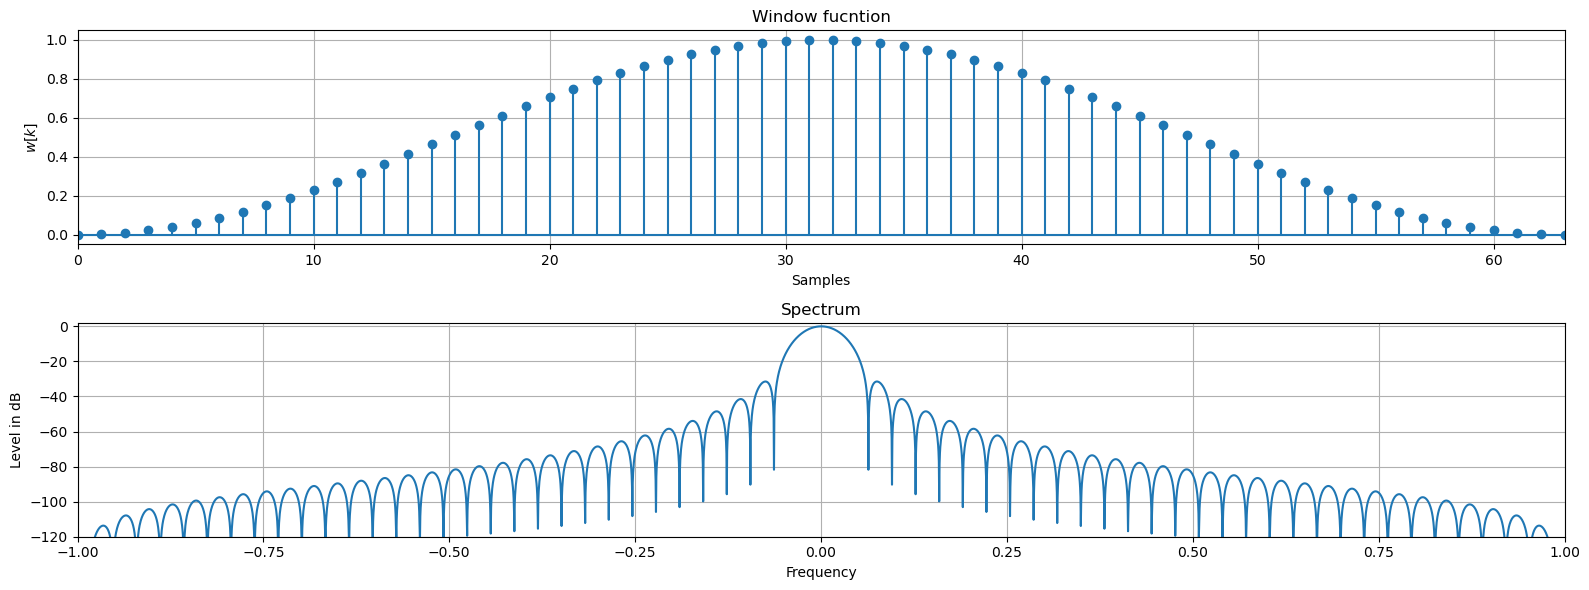

In [3]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window fucntion')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
w = np.hanning(64)
dft_win(w)


* Fungsi Jendela Utama

Berikut adalah rumus untuk fungsi jendela utama. Durasi dari fungsi jendela adalah \( N \), dan \( w(n) \) adalah sampel dari fungsi jendela. Dalam pustaka scipy dari Python, semua jenis jendela yang umum digunakan telah disediakan di dalam paket sinyal. Cara memanggilnya cukup sederhana. Selanjutnya, dalam bentuk tabel dan grafik, akan diperlihatkan efektivitas relatif dari berbagai jendela.

Aturan: jumlah dari modulus koefisien fungsi jendela sama dengan satu

* Jendela Persegi

\begin{equation}
w(n) = 1
\end{equation}

Jendela yang paling sederhana memiliki karakteristik yang kurang baik dan secara otomatis terbentuk ketika rangkaian direduksi menjadi N sampel. Tingkat maksimum dari sisi gelombang (SBG) dalam karakteristik frekuensi jendela persegi adalah -13 dB.

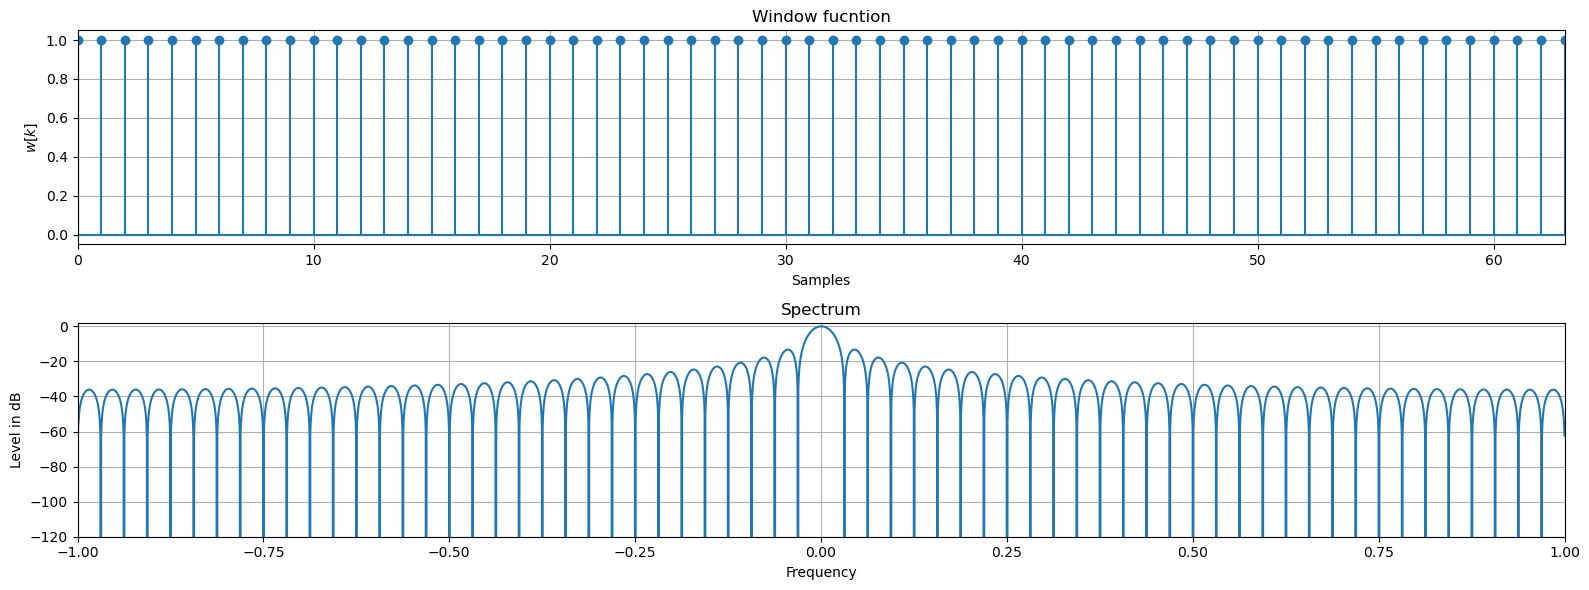

In [5]:
N = 64
dft_win(np.ones(N))

* Jendela Segitiga

Dikenal sebagai jendela Bartlett.

\begin{equation}
w(n) = 1 - \frac{n - N/2}{L/2}
\end{equation}

dimana:
\begin{equation}
L = N, N+1, N+2
\end{equation}

Maksimum Tingkat Sisi Gelombang: -26 dt(M)

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\2351681661.py:49: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(triang(N))


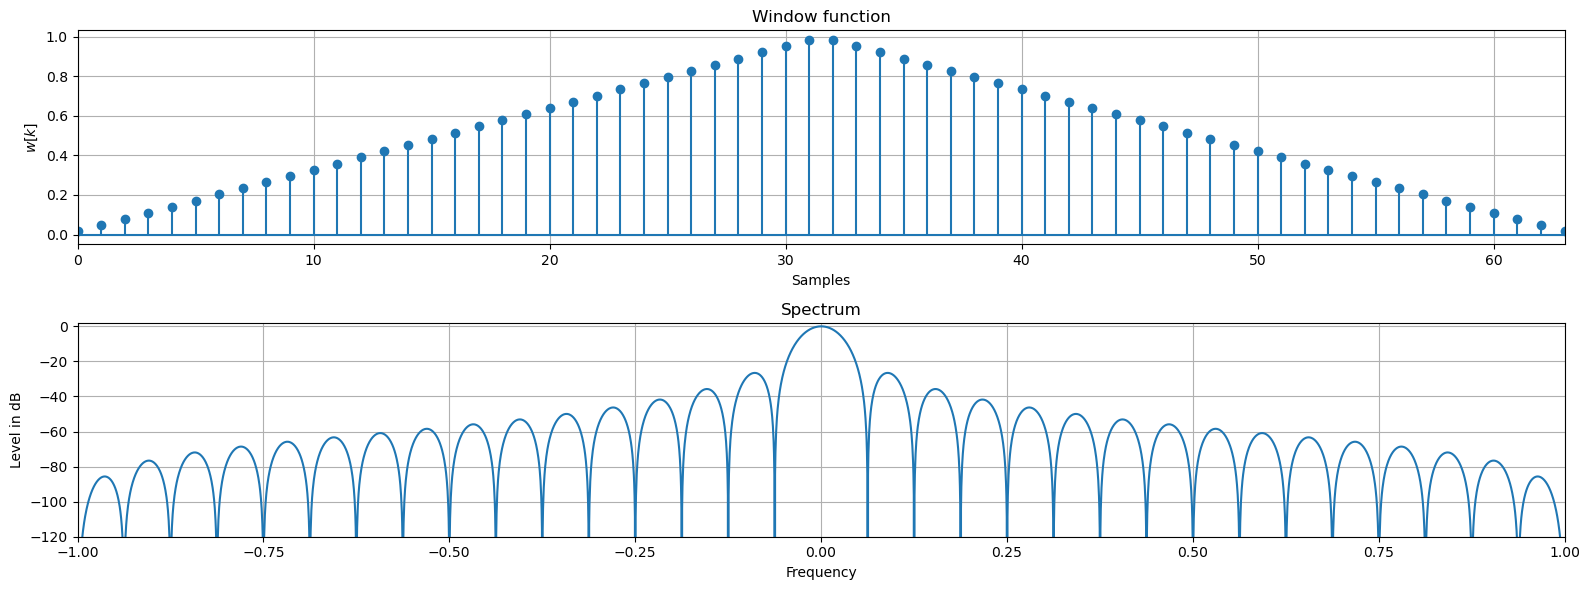

In [8]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import triang

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(triang(N))


* Jendela Sinusoidal

\begin{equation}
w(n) = sin(\frac{\pi  .n}{N - 1})
\end{equation}

Implementasi perangkat lunak dan keras menjadi lebih mudah dengan jendela sinusoidal. Tingkat maksimum sisi gelombang dari jendela sinusoidal adalah -23 dB.

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\826282812.py:49: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(cosine(N))


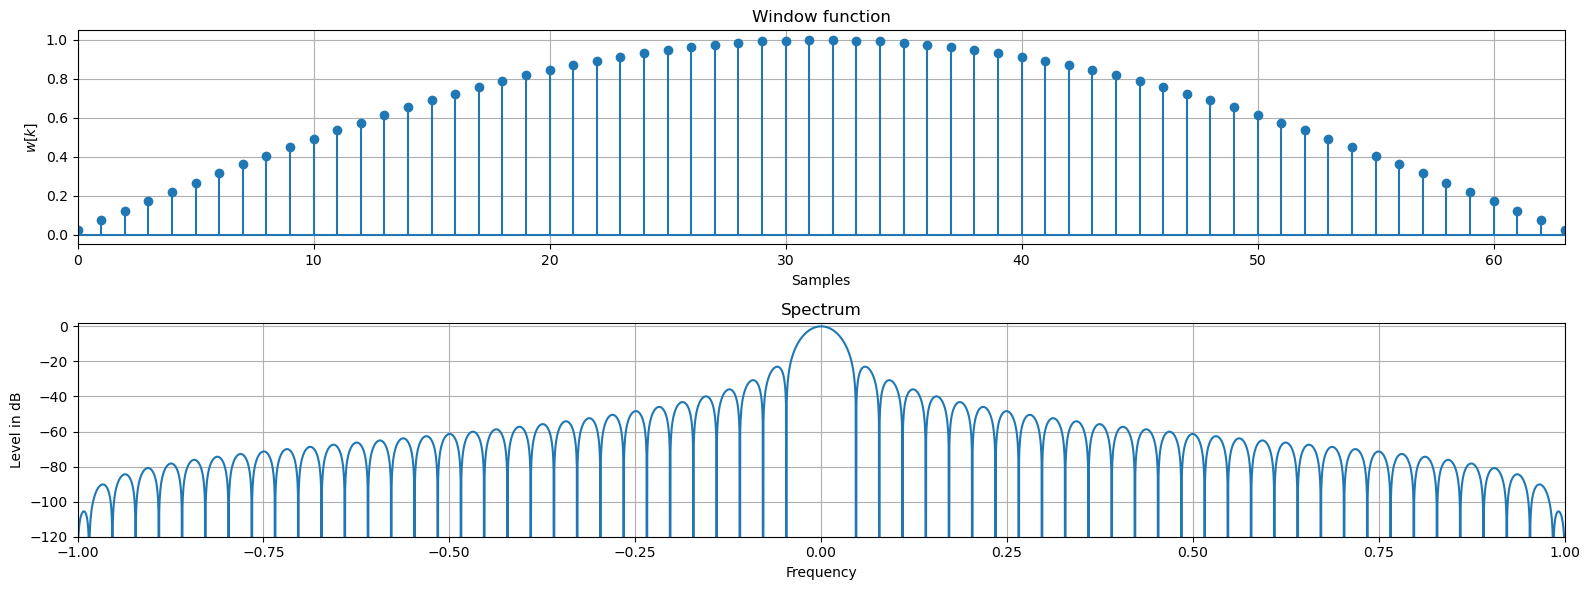

In [10]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import cosine

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(cosine(N))


* Jendela Hann (Hanning)

\begin{equation}
w(n) = 0.5 . [1 - cos(\frac{2 \pi n}{N - 1})]
\end{equation}

Jendela Hann, juga dikenal sebagai jendela Hanning, merupakan jendela Blackman-Harris orde kedua. Tingkat maksimum dari sisi gelombang adalah -31,5 dB.

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\1143702728.py:49: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(hann(N))


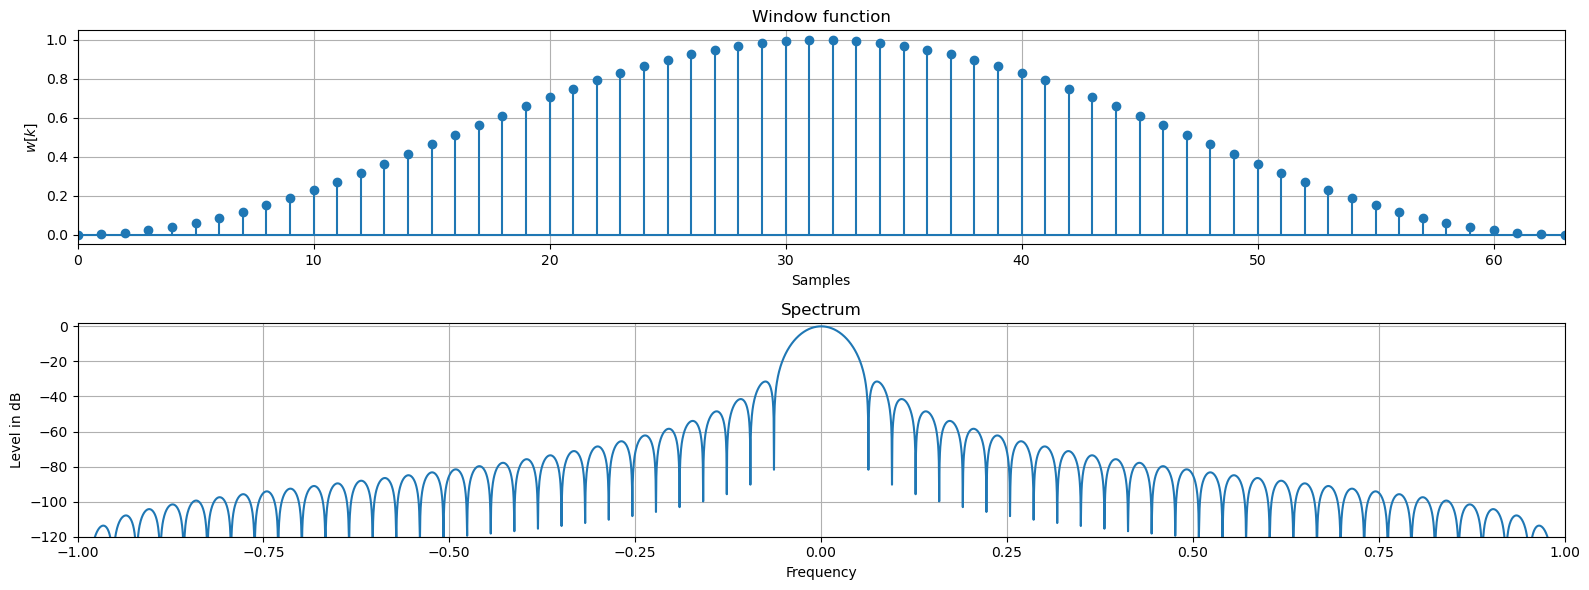

In [12]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import hann

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(hann(N))


* Jendela Hamming

\begin{equation}
w(n) = 0.53836 - 0.46164 . cos(\frac{2 \pi n}{N - 1})
\end{equation}

Maksimum Tingkat Sisi Gelombang: -42 dB.

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\3559442256.py:49: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(hamming(N))


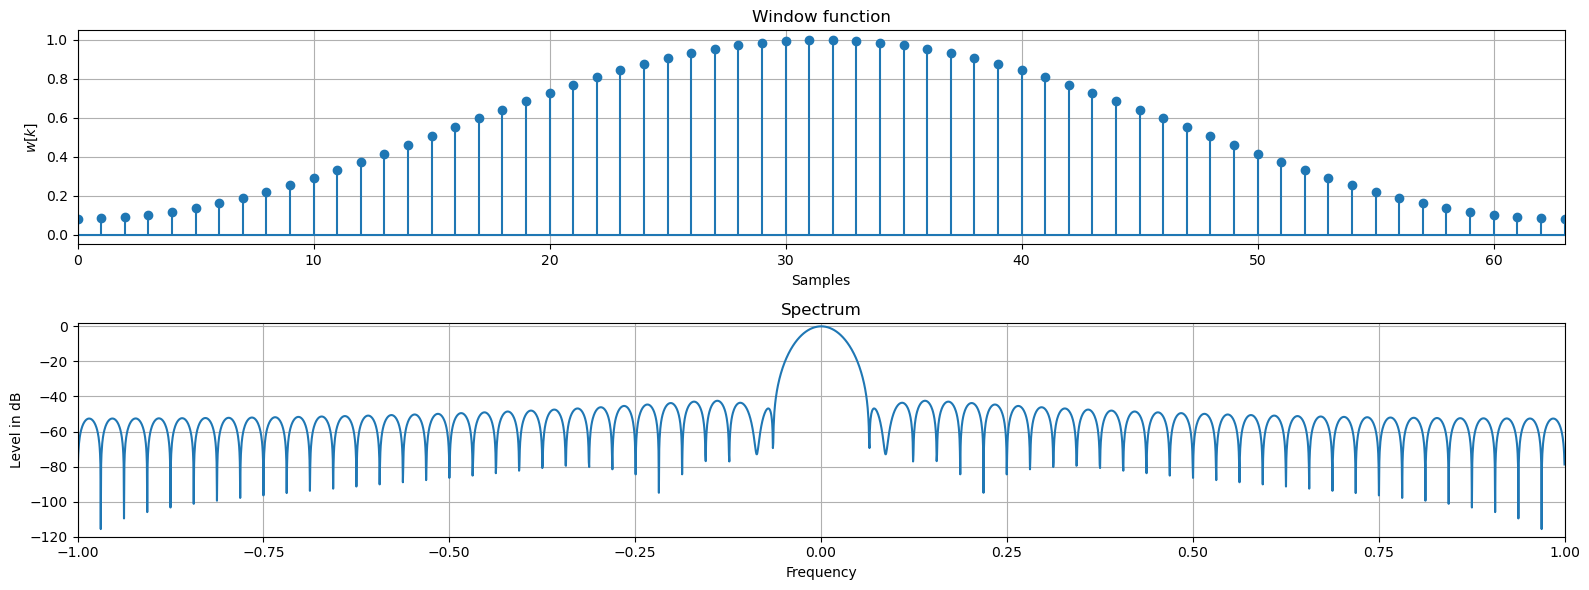

In [13]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import hamming

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(hamming(N))


* Jendela Blackman

\begin{equation}
w(n) = a_0 - a_1 . cos(\frac{2 \pi n}{N - 1}) + a_2 . cos(\frac{4 \pi n}{N - 1})
\end{equation}

Dimana: \begin{equation}
a_0 = \frac{1-a}{2}; a_1 = 0.5; a_2 = 0.5 . a
\end{equation}

Pada <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>a</mi>
  <mo>=</mo>
  <mn>0.16</mn>
</math> maksimum tingkat sisi gelombang -58dB.

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\1298525309.py:49: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(blackman(N))


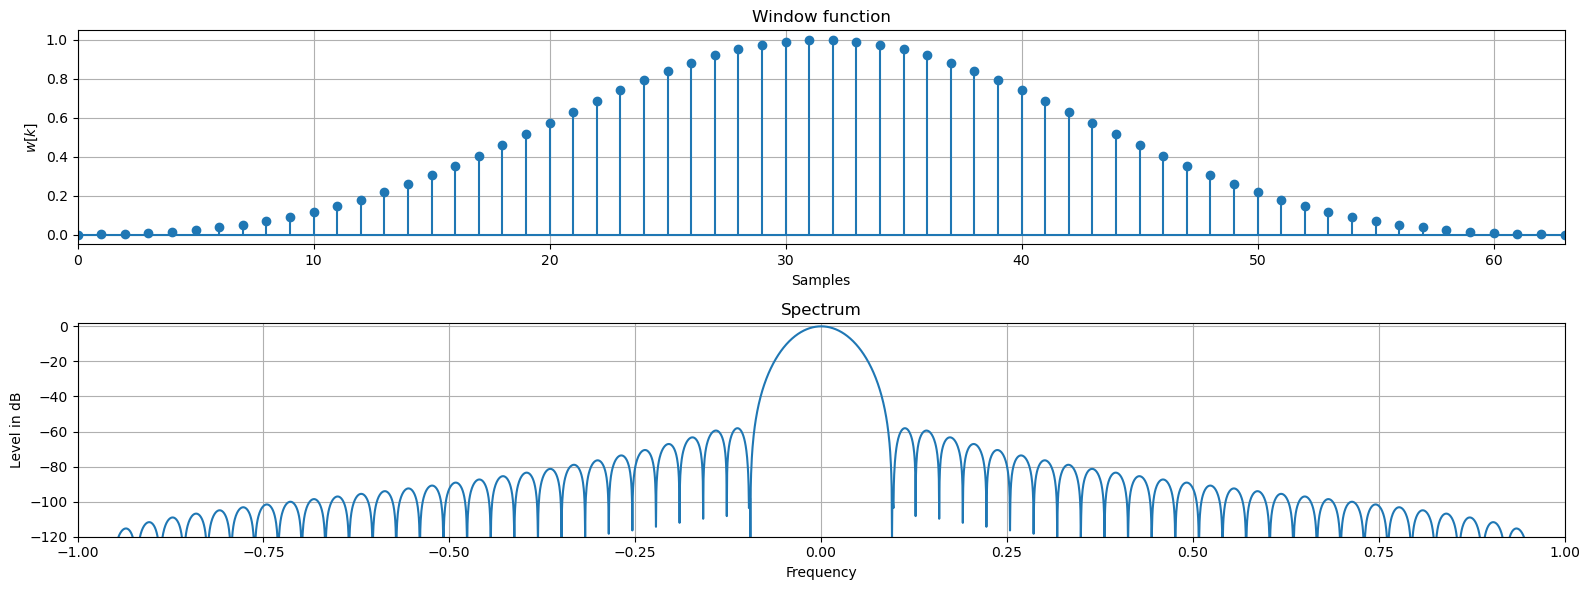

In [14]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import blackman

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(blackman(N))


* Jendela Blackman-Harris

Dibentuk dengan menjumlahkan empat suku (yaitu jendela orde keempat).

\begin{equation}
w(n) = a_0 - a_1 . cos(\frac{2 \pi n}{N - 1}) + a_2 . cos(\frac{4 \pi n}{N - 1}) - a_3 . cos(\frac{6 \pi n}{N - 1})
\end{equation}

Dimana: \begin{equation}
a_0 = 0.35875, a_1 = 0.48829, a_2 = 0.14128, a_3 = 0.01168
\end{equation}

Maksimum level sisi gelombang: -92 dB.

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\2957549117.py:49: DeprecationWarning: Importing blackmanharris from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackmanharris' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(blackmanharris(N))


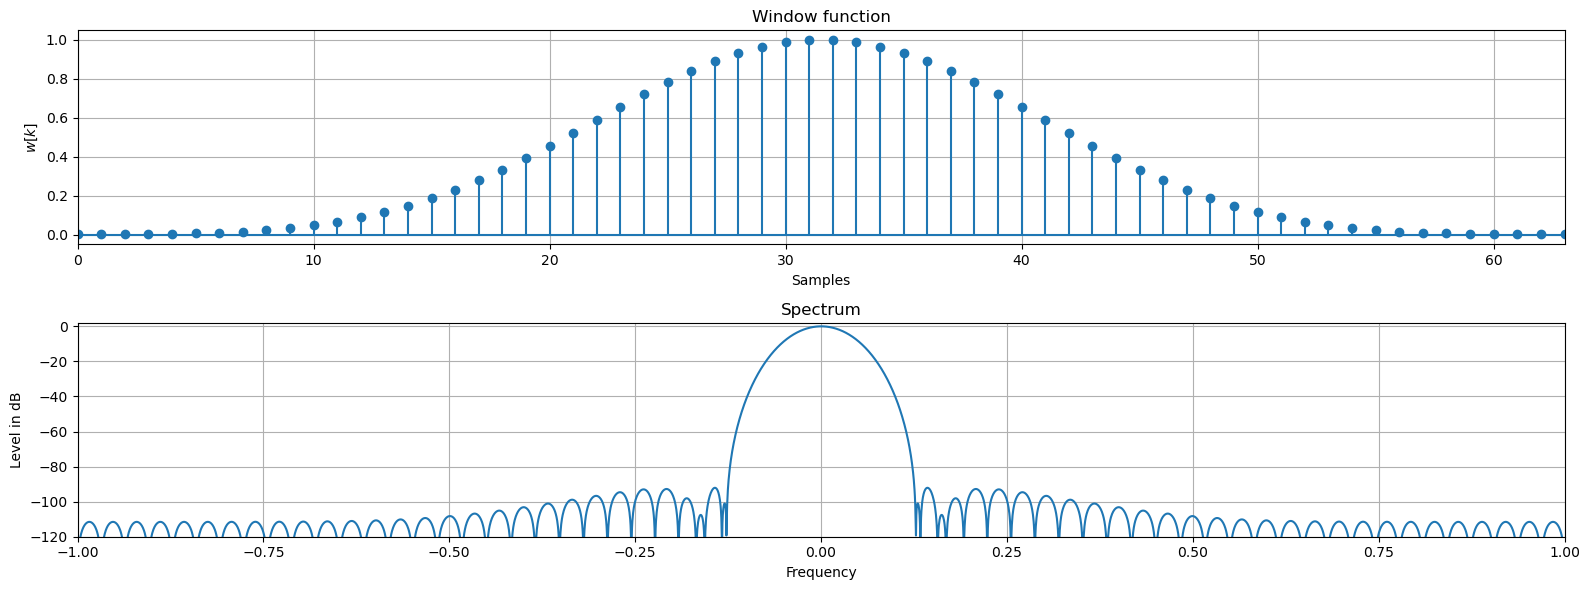

In [15]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import blackmanharris

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(blackmanharris(N))


* Jendela Blackman-Nuttall

Formula untuk jendela Blackman-Nuttall mirip dengan Blackman-Harris, namun dengan perbedaan pada koefisiennya. Jendela ini dibentuk sebagai penjumlahan empat suku.

\begin{equation}
w(n) = a_0 - a_1 . cos(\frac{2 \pi n}{N - 1}) + a_2 . cos(\frac{4 \pi n}{N - 1}) - a_3 . cos(\frac{6 \pi n}{N - 1})
\end{equation}

Dimana \begin{equation}
a_0 = 0.3635819, a_1 = 0.4891775, a_2 = 0.1365995, a_3 = 0.0106411
\end{equation}

Tingkat maksimum gelombang samping: -93 dB.

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\2470600729.py:49: DeprecationWarning: Importing nuttall from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.nuttall' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(nuttall(N))


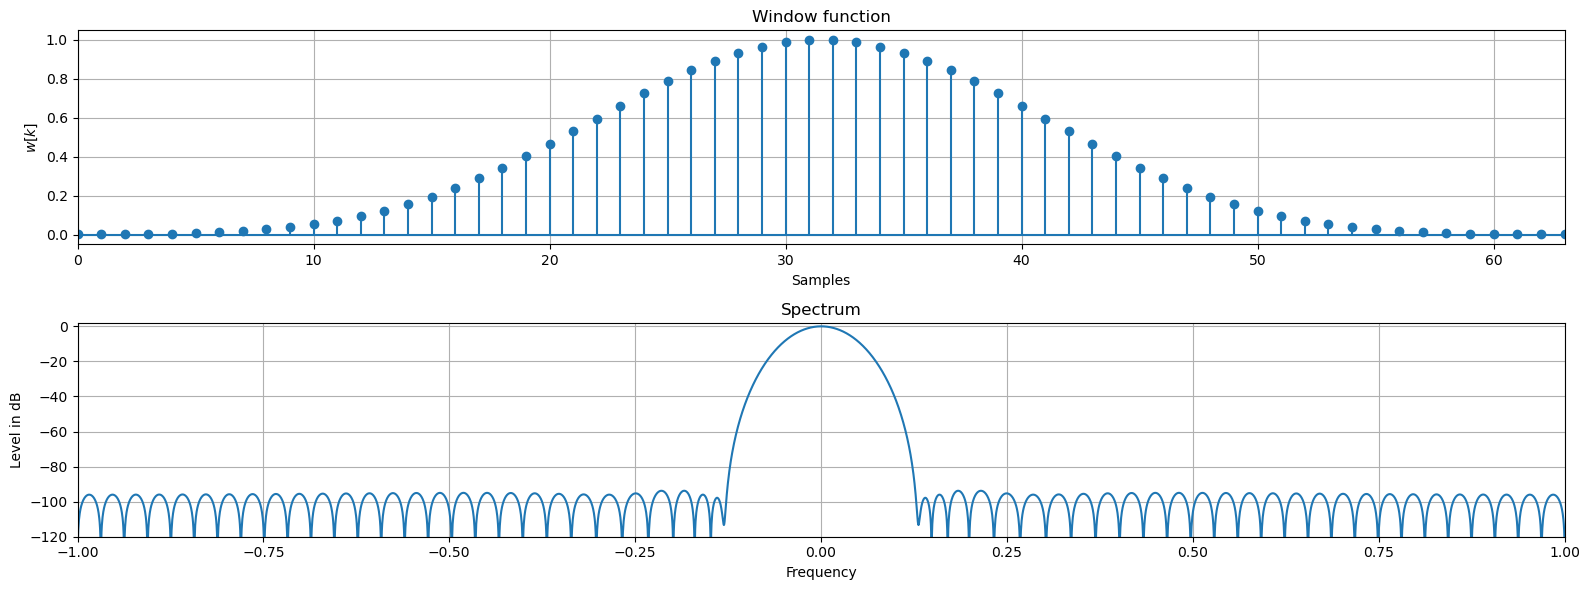

In [16]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import nuttall

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(nuttall(N))


* Jendela Daftar Puncak (Flat-Top Window)

\begin{equation}
w(n) = a_0 - a_1 . cos(\frac{2 \pi n}{N - 1}) + a_2 . cos(\frac{4 \pi n}{N - 1}) - a_3 . cos(\frac{6 \pi n}{N - 1}) + a_4 . cos(\frac{8 \pi n}{N - 1})
\end{equation}

Dimana:

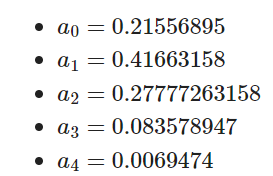

Maksimum level lobe samping: -70 dB.

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\1503061414.py:49: DeprecationWarning: Importing flattop from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.flattop' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(flattop(N))


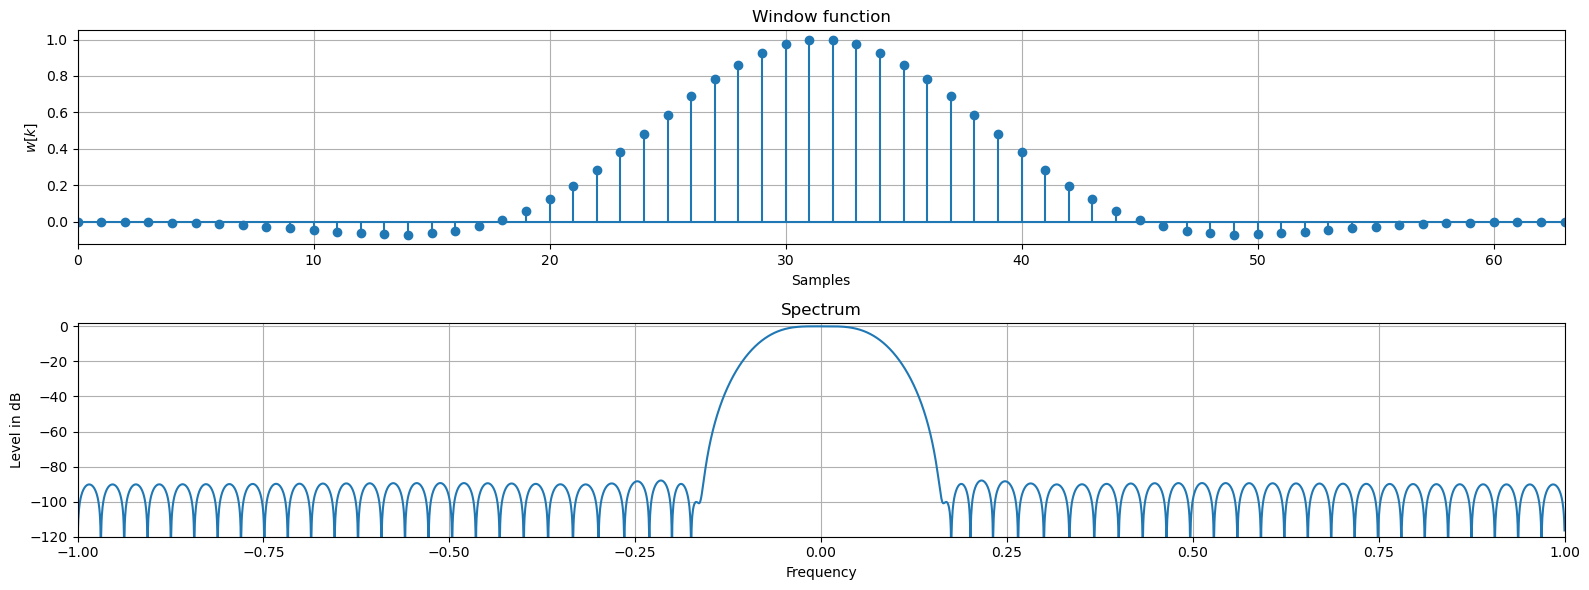

In [17]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import flattop

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(flattop(N))


* Jendela Kaiser

Variasi terjadi dengan parameter α, yang mengontrol tingkat penurunan dan kemiringan karakteristik frekuensi. Jendela Kaiser adalah jenis jendela serbaguna yang memungkinkan pengguna memilih parameter filtrasi sesuai dengan kebutuhan tugas yang beragam.

\begin{equation}
w(n) = \frac{|I_0 \sqrt{1 - (\frac{2n - N + 1}{N-1})^2}|}{|I_0 (\beta)|}
\end{equation}

Dimana:

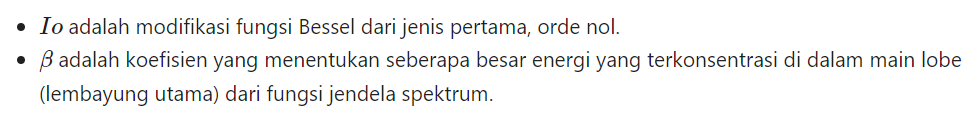

Semakin besar β, semakin besar proporsi energi di dalam lobe utama, dan semakin lebar lobe utama. Akibatnya, tingkat side-lobe menjadi lebih rendah, yang menghasilkan penekanan yang lebih baik dalam tugas filtrasi. Dalam praktiknya, fungsi Kaiser jarang diimplementasikan dalam perangkat keras, namun lebih sering digunakan dalam perangkat lunak, khususnya dalam perhitungan koefisien filter FIR. Nilai β yang umum digunakan dalam kasus nyata berkisar antara 5 hingga 11.

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\214830360.py:49: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(kaiser(N, beta=4))


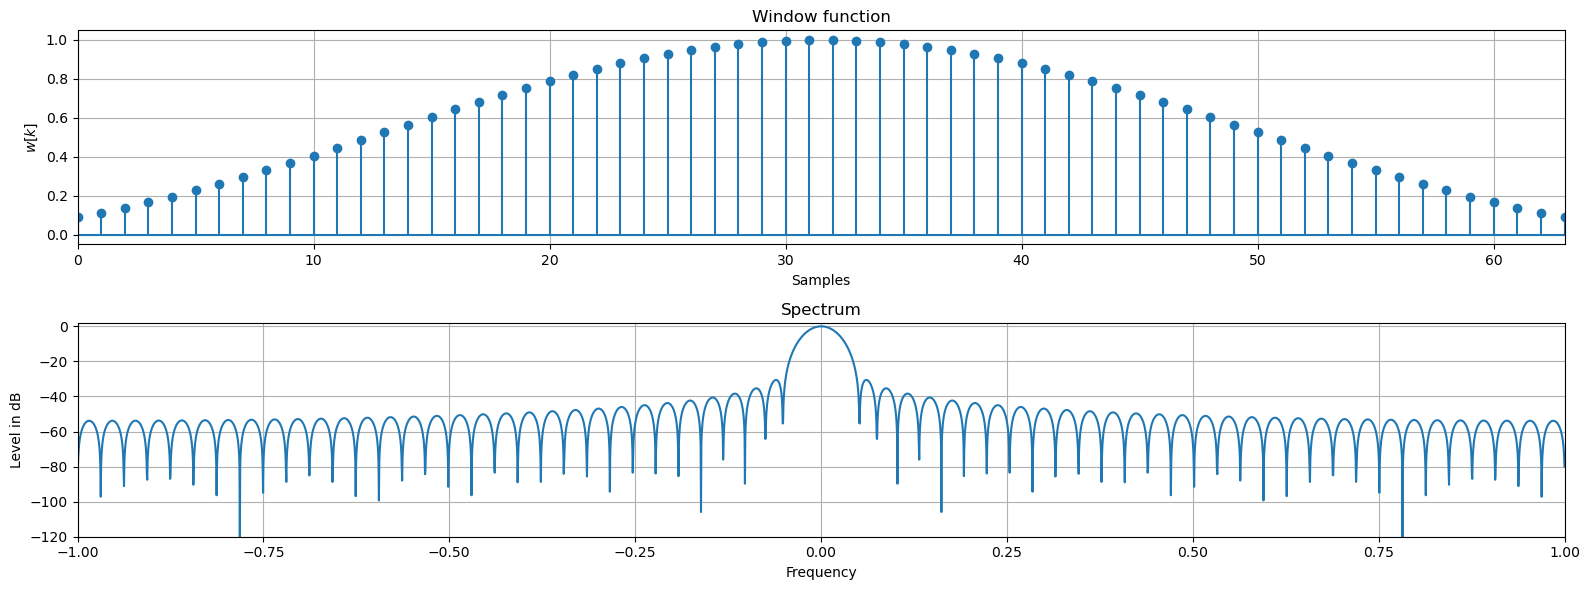

In [18]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import kaiser

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(kaiser(N, beta=4))


C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\2511200148.py:49: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(kaiser(N, beta=10))


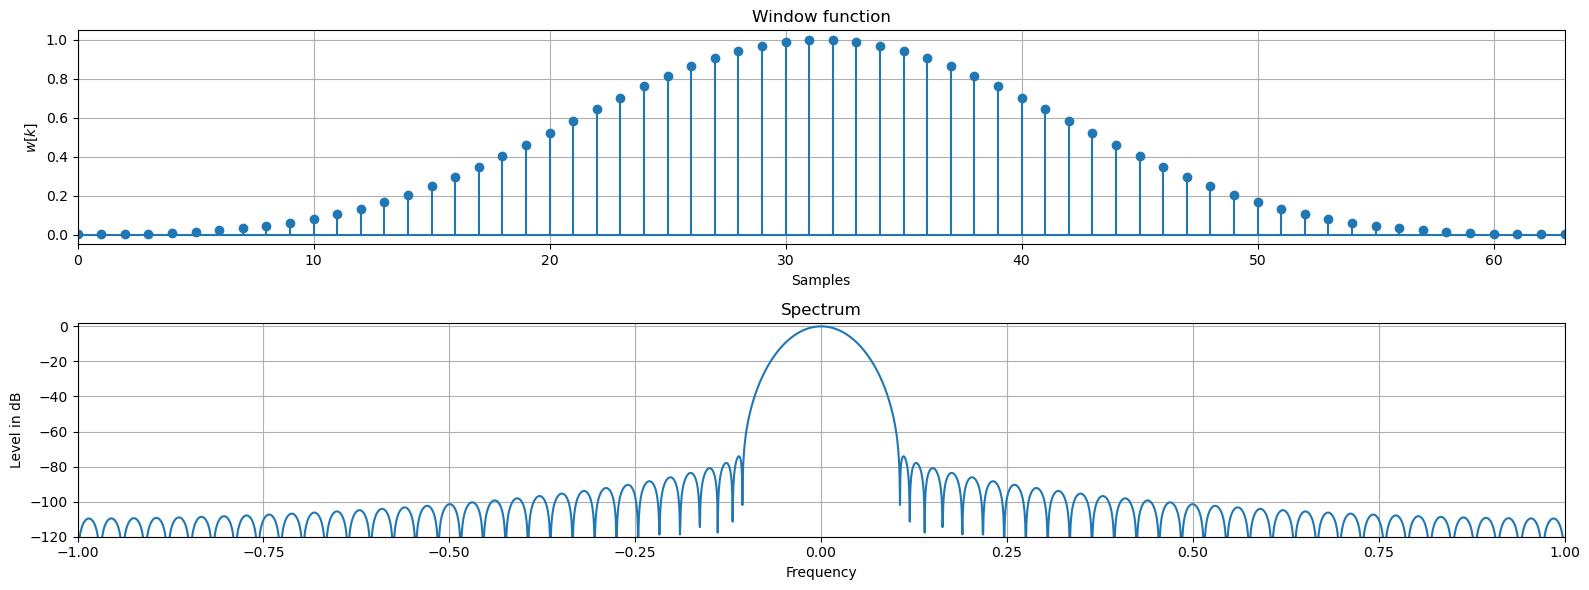

In [19]:
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
from scipy.signal import kaiser

def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window function')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
N = 64
dft_win(kaiser(N, beta=10))


* Fungsi Jendela dalam Numpy

Dalam paket numpy Python, terdapat kumpulan fungsi jendela yang terbatas, seperti:

- `bartlett(M)`: untuk menghasilkan fungsi segitiga.
- `blackman(M)`: untuk menghasilkan fungsi Blackman.
- `hamming(M)`: untuk menghasilkan jendela Hamming.
- `hanning(M)`: untuk menghasilkan jendela Hanning atau Hann.
- `kaiser(M, beta)`: untuk menghasilkan jendela Kaiser.

Berbeda dengan paket numpy, paket scipy memperluas kemampuan filtrasi jendela dengan menambahkan fungsionalitas yang lebih luas. Contoh-contoh penggunaan dapat ditemukan di atas. Berikut adalah daftar fungsi utama dari paket scipy.signal.

* Fungsi Jendela dalam Scipy

|Fungsi|Deskripsi|Level Side-Lob|
|------|----------|--------------|
|boxcar(M, sym)|jendela persegi panjang |13|
|triang(M, sym)|jendela segitiga|26|
|bartlett(M, sym)|jendela segitiga (Bartlett)|26|
|cosine (M, sym)|jendela kosinus|23|
|hann(M, sym)|jendela hann (Hanning)|31.5|
|hanning(M, sym)|jendela hanning (Hann)|31.5|
|hamming(M ,sym|jendela hamming|42|
|blackman(M, sym)|jendela blackman|58|
|blackmanharris(M, sym)|jendela balckman-harris|92|
|nuttall(M, sym)|jendela nuttall|93|
|flattop(M, sym|jendela dengan puncak datar|70|
|kaiser(M, beta, sym)|fungsi kaiser (parameter - β)|F(β)|
|gaussian(M, std, sym)|fungsi gauss (parameter - α)|F(α)|

# Fungsi Utama Jendela

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\1960351842.py:10: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,1] = triang(N)
C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\1960351842.py:11: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,2] = hann(N)
C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\1960351842.py:12: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,3] = hamming(N)
C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\1960351842.py:1

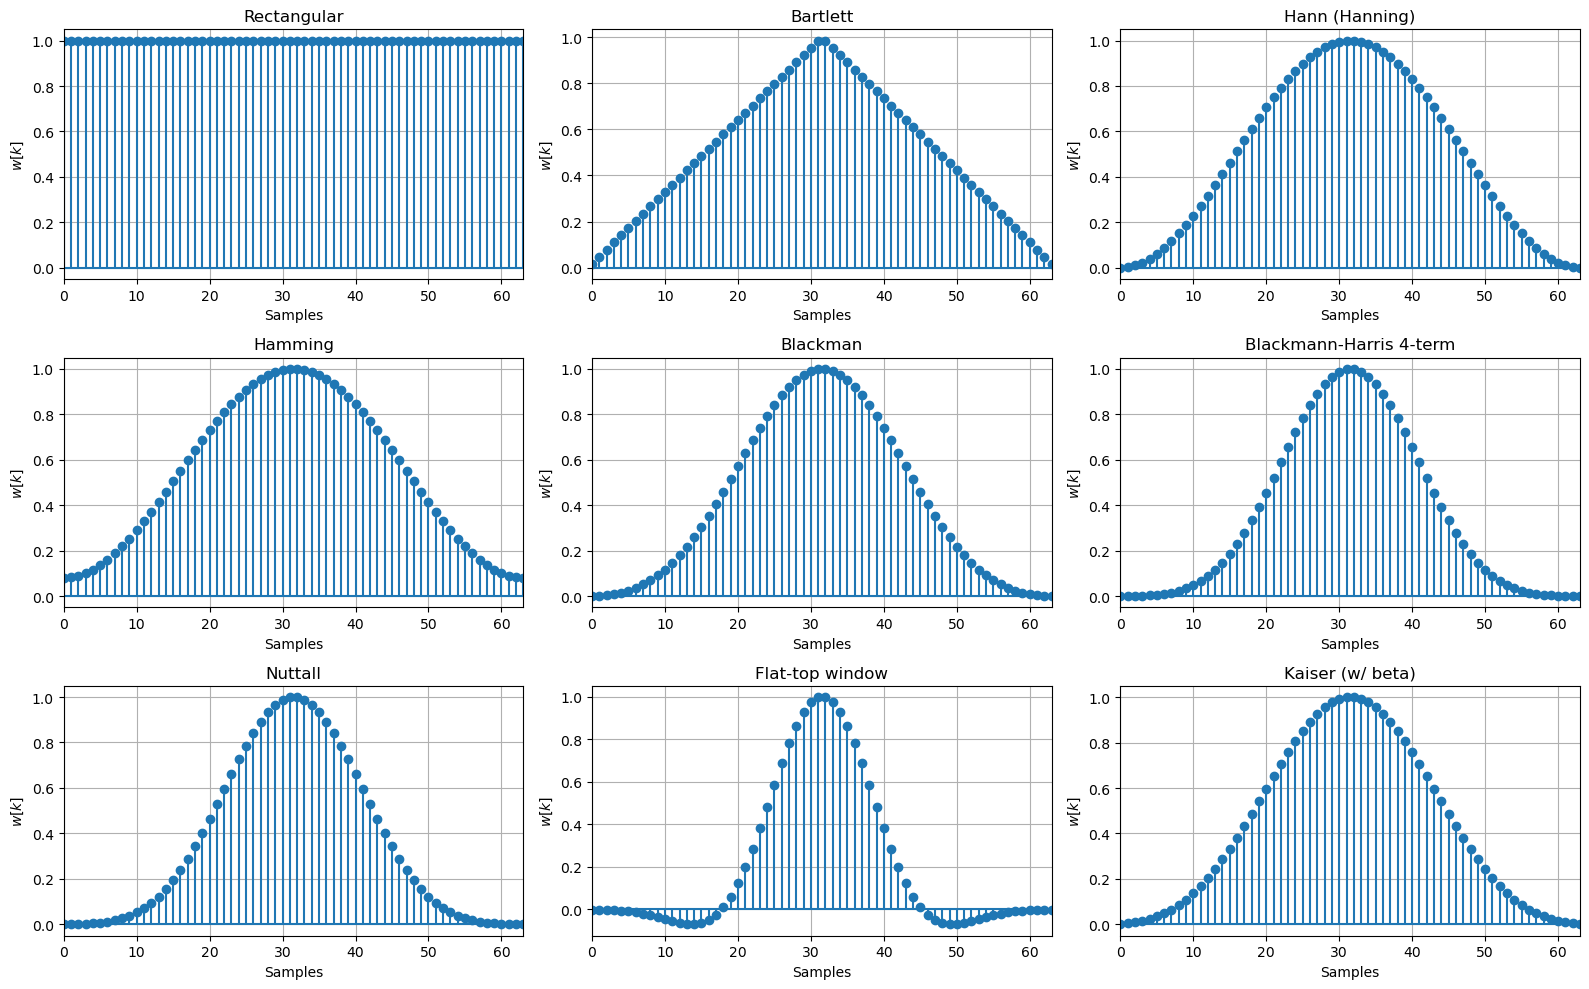

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import triang, hann, hamming, blackman, blackmanharris, nuttall, flattop, kaiser

N = 64
# Semua jendela
ww = np.zeros((N, 9))

ww[:,0] = np.ones(N)
ww[:,1] = triang(N)
ww[:,2] = hann(N)
ww[:,3] = hamming(N)
ww[:,4] = blackman(N)
ww[:,5] = blackmanharris(N)
ww[:,6] = nuttall(N)
ww[:,7] = flattop(N)
ww[:,8] = kaiser(N, beta=8)

lst_titles = ['Rectangular', 'Bartlett', 'Hann (Hanning)', 
              'Hamming', 'Blackman', 'Blackmann-Harris 4-term', 
              'Nuttall', 'Flat-top window', 'Kaiser (w/ beta)'
             ]

# Plot fungsi jendela dan spektrumnya
fig = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.stem(ww[:,i], basefmt='C0')
    plt.title(lst_titles[i])
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
plt.tight_layout()
plt.show()


# Spektrum Fungsi Jendela Utama

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\3340605353.py:12: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,1] = triang(N)
C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\3340605353.py:13: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,2] = hann(N)
C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\3340605353.py:14: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,3] = hamming(N)
C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\3340605353.py:1

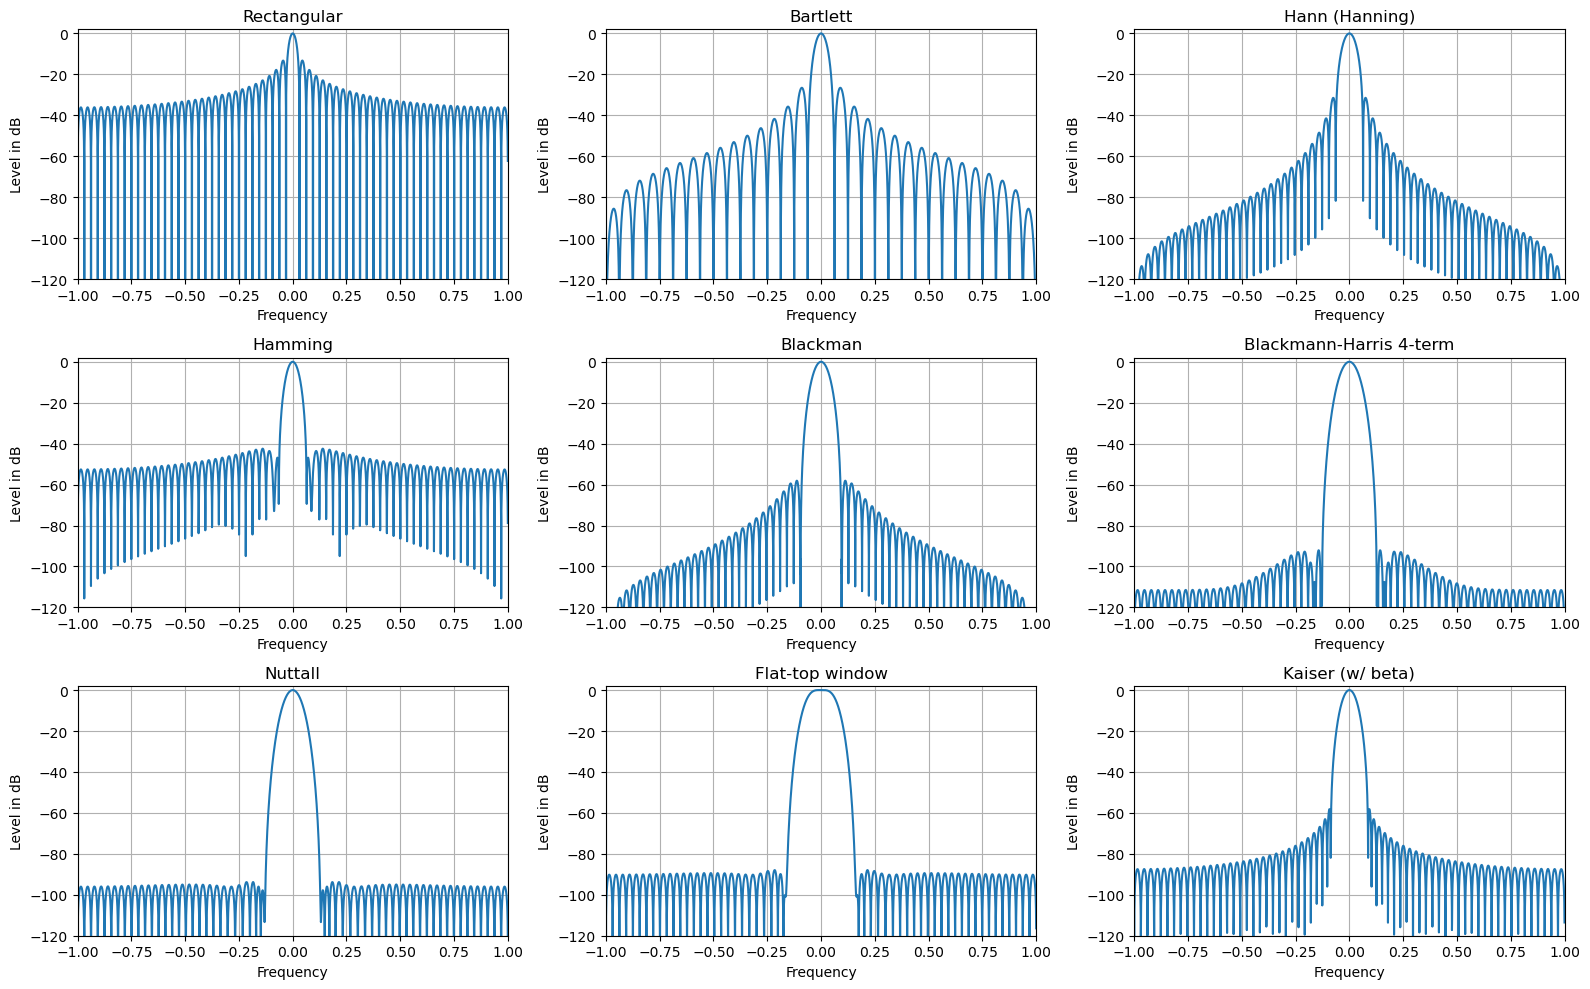

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import triang, hann, hamming, blackman, blackmanharris, nuttall, flattop, kaiser
from numpy.fft import fft, fftshift

N = 64
NFFT = 2**12
# Semua jendela
ww = np.zeros((N, 9))

ww[:,0] = np.ones(N)
ww[:,1] = triang(N)
ww[:,2] = hann(N)
ww[:,3] = hamming(N)
ww[:,4] = blackman(N)
ww[:,5] = blackmanharris(N)
ww[:,6] = nuttall(N)
ww[:,7] = flattop(N)
ww[:,8] = kaiser(N, beta=8)

lst_titles = ['Rectangular', 'Bartlett', 'Hann (Hanning)', 
              'Hamming', 'Blackman', 'Blackmann-Harris 4-term', 
              'Nuttall', 'Flat-top window', 'Kaiser (w/ beta)'
             ]

# Hitung FFT
WW = fft(ww, NFFT, axis=0)
WW = WW / np.amax(WW, axis=0) + np.nextafter(0,1)

tt = np.linspace(-1, 1, NFFT)

# Plot fungsi jendela dan spektrumnya
fig2 = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))
    plt.title(lst_titles[i])
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
plt.tight_layout()
plt.show()


# Pencarian Sinyal Lemah

Sebelumnya telah disebutkan bahwa penggunaan filtrasi jendela memungkinkan kita untuk mengekstraksi sinyal-sinyal lemah di tengah-tengah sinyal yang lebih kuat. Untuk membuktikan hal ini, kita akan membangun grafik dari jumlah dua sinyal harmonis, yang frekuensinya berdekatan dan memiliki perbedaan amplitudo yang signifikan.

Pada grafik berikut, akan disajikan spektrum tanpa filtrasi jendela (menggunakan jendela persegi panjang) dan dengan filtrasi jendela input menggunakan jendela Kaiser dengan parameter β yang ditentukan = 7.

C:\Users\IP SLIM 3i\AppData\Local\Temp\ipykernel_18656\3163657958.py:15: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  wn = kaiser(N, beta=7)


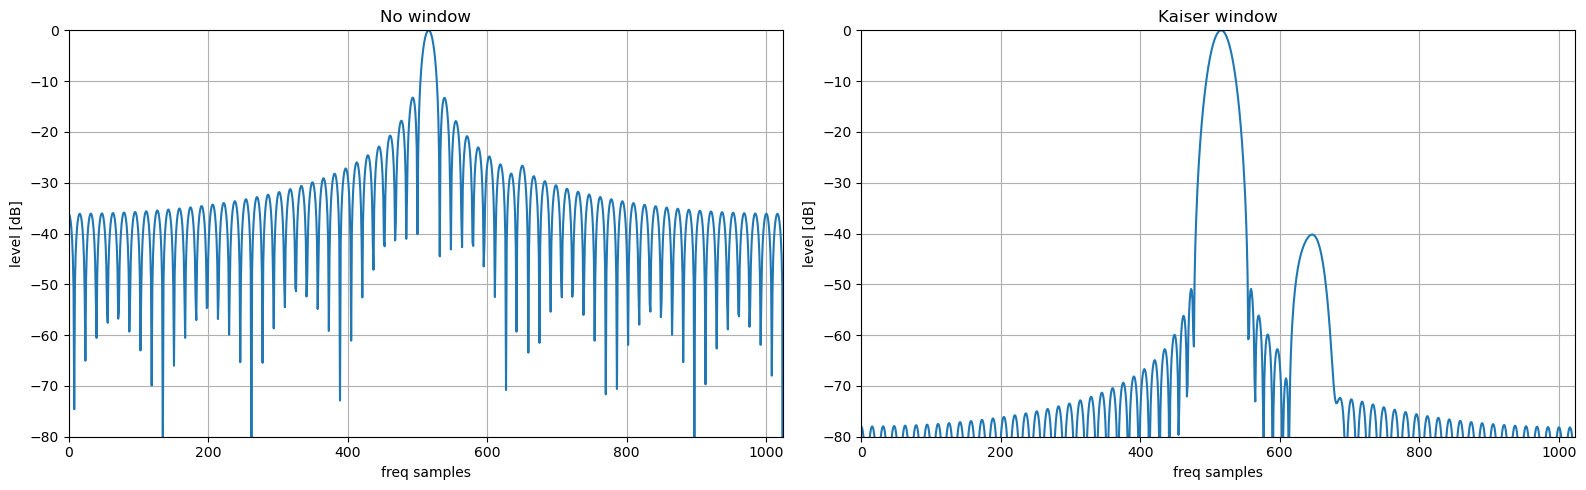

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiser
from numpy.fft import fft

# Input parameters
N = 128
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = 100*np.cos(2*np.pi*32*tt)+np.cos(2*np.pi*40*tt)

# Window (Kaiser)
wn = kaiser(N, beta=7)
yy = xx*wn

# Calculate FFT 1
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

# Calculate FFT 2
yft = np.abs(fft(yy, NFFT))
ylg = 20*np.log10(yft / np.max(yft))

lst_ffts = [slg, ylg]
lst_wins = ['No window', 'Kaiser window']
plt.figure(figsize=(16, 5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(lst_wins[i])
    plt.xlabel('freq samples')
    plt.ylabel('level [dB]')
    plt.plot(lst_ffts[i])
    plt.xlim([0, NFFT//2])
    plt.ylim([-80, 0])
    plt.grid(True)
plt.tight_layout()
plt.show()


Seperti yang terlihat pada gambar sebelumnya, tanpa menggunakan fungsi jendela, sulit untuk membedakan sinyal lemah di tengah sinyal yang kuat. Namun, dengan menerapkan fungsi jendela yang memiliki karakteristik penyupresi yang baik, kita berhasil mendeteksi sinyal lemah di tengah sinyal yang kuat!